In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

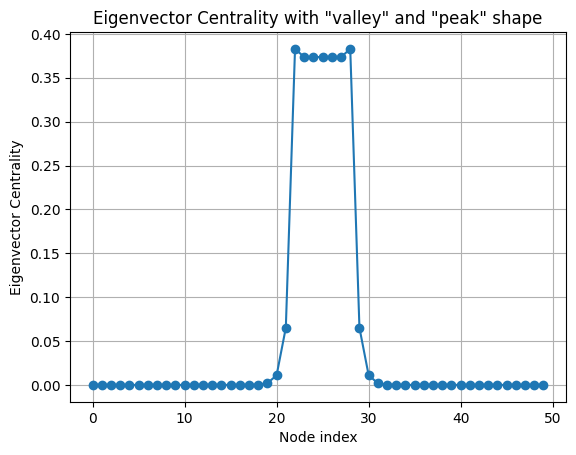

In [43]:
G = nx.Graph()

n = 50  # число узлов

# Добавляем узлы
G.add_nodes_from(range(n))

# Связываем узлы в цепочку слева (от 0 до 21)
for i in range(21):
    G.add_edge(i, i+1)

# Создаем "горбик" в центре - плотный клик из узлов с 22 по 28
clique_nodes = list(range(22, 29))
for i in clique_nodes:
    for j in clique_nodes:
        if i < j:
            G.add_edge(i, j)

# Связываем "горбик" с цепочками
G.add_edge(21, 22)  # левый переход к клике
G.add_edge(28, 29)  # правый переход от клики

# Цепочка справа (от 29 до 49)
for i in range(29, n-1):
    G.add_edge(i, i+1)

# Вычисляем собственные векторные центральности
centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Сортируем по индексу узла
centrality_values = [centrality[i] for i in range(n)]

# Визуализируем
plt.plot(range(n), centrality_values, marker='o')
plt.xlabel('Node index')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality with "valley" and "peak" shape')
plt.grid(True)
plt.show()